# Importing libraries and data

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from babel.numbers import format_currency
from datetime import datetime

In [3]:
df = pd.read_excel(r'C:\Users\user\Desktop\base_teste_ad_1.xlsx')
df

,data_solicitacao,data_venda,data_pagto,valor_venda,pol_comissao,valor_comissao,estado_cliente,estado_vendedor,produto,vendedor_id
0,2021-01-13,2021-01-12,2021-02-01 00:00:00,NaN,un.,750.0,SC,PR,A,V_1
1,2021-02-14,2021-02-16,2021-03-01 00:00:00,NaN,un.,750.0,SC,PR,A,V_1
2,2021-02-17,2021-02-18,2021-03-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_23
3,2021-03-21,2021-03-25,2021-04-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_23
4,2021-01-29,2021-01-31,2021-03-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_30
...,...,...,...,...,...,...,...,...,...,...
93,2021-06-13,2021-06-23,NaN,150000.0,0.04,6000.0,MG,SC,E,V_15
94,2021-05-09,2021-05-20,2021-06-02 00:00:00,180000.0,0.04,7200.0,NaN,SC,E,V_41
95,2021-02-12,2021-02-18,2021-03-02 00:00:00,180000.0,0.04,7200.0,PR,RS,E,V_14
96,2021-05-12,2021-05-19,2021-06-02 00:00:00,180000.0,0.04,7200.0,MG,SC,E,V_15


### Data treatment and understading of variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_solicitacao  98 non-null     datetime64[ns]
 1   data_venda        98 non-null     datetime64[ns]
 2   data_pagto        91 non-null     object        
 3   valor_venda       38 non-null     float64       
 4   pol_comissao      98 non-null     object        
 5   valor_comissao    91 non-null     float64       
 6   estado_cliente    34 non-null     object        
 7   estado_vendedor   98 non-null     object        
 8   produto           98 non-null     object        
 9   vendedor_id       98 non-null     object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 7.8+ KB


In [5]:
#all date columns in same dtype
df['data_pagto'] = pd.to_datetime(df['data_pagto'])
#We won't need the time variable so lets switch to only date format
df['data_solicitacao_new'] = df['data_solicitacao'].dt.date 
df['data_venda_new'] = df['data_venda'].dt.date
df['data_pagto_new'] = df['data_pagto'].dt.date


In [6]:
df = df.drop(columns=['data_solicitacao','data_pagto','data_venda'])
df

,valor_venda,pol_comissao,valor_comissao,estado_cliente,estado_vendedor,produto,vendedor_id,data_solicitacao_new,data_venda_new,data_pagto_new
0,NaN,un.,750.0,SC,PR,A,V_1,2021-01-13,2021-01-12,2021-02-01
1,NaN,un.,750.0,SC,PR,A,V_1,2021-02-14,2021-02-16,2021-03-01
2,NaN,un.,750.0,NaN,PR,A,V_23,2021-02-17,2021-02-18,2021-03-01
3,NaN,un.,750.0,NaN,PR,A,V_23,2021-03-21,2021-03-25,2021-04-01
4,NaN,un.,750.0,NaN,PR,A,V_30,2021-01-29,2021-01-31,2021-03-01
...,...,...,...,...,...,...,...,...,...,...
93,150000.0,0.04,6000.0,MG,SC,E,V_15,2021-06-13,2021-06-23,NaT
94,180000.0,0.04,7200.0,NaN,SC,E,V_41,2021-05-09,2021-05-20,2021-06-02
95,180000.0,0.04,7200.0,PR,RS,E,V_14,2021-02-12,2021-02-18,2021-03-02
96,180000.0,0.04,7200.0,MG,SC,E,V_15,2021-05-12,2021-05-19,2021-06-02


In [7]:
#Checking for unique values in each variable
df.nunique(axis=0)

valor_venda             35
pol_comissao             5
valor_comissao          31
estado_cliente           6
estado_vendedor          9
produto                  6
vendedor_id             38
data_solicitacao_new    79
data_venda_new          66
data_pagto_new          25
dtype: int64

In [8]:
#Understanding valor_venda and valor_comissao. How our tickets look like?
df.describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,valor_venda,valor_comissao
count,38.00,91.00
mean,214164.21,1505.22
std,305305.62,2472.85
min,2000.00,52.00
25%,8782.50,108.50
50%,88000.00,450.00
75%,264000.00,750.00
max,1092000.00,10920.00


In [9]:
# As we can see, min and max indicates outliers in valor_venda. I'd like to explore that behaviour later.
# At a glance we can see a lot of missing data, but let's check the count
df.isna().sum()

valor_venda             60
pol_comissao             0
valor_comissao           7
estado_cliente          64
estado_vendedor          0
produto                  0
vendedor_id              0
data_solicitacao_new     0
data_venda_new           0
data_pagto_new           7
dtype: int64

### Insights so far
1) 60 orders without valor_venda informations. That's a shame, it represents around 65% of completed sales and certainly messes with our analysis.
2) We have 7 incomplete selling orders, less than 10% of total orders which I assume is nothing to worry about, but we may want to understand these events later.
3) estado_cliente won't be of great help because of missing data too.
4) pol_comissao should be treated for a single data format, but I can't see much use for that information for now.
5) Datetime columns must be treated so we can understand sales efficiency and results achieved per period.

In [10]:
# Since we have three different dates for selling process, we must understand sales efficiency.
# Assumption:data_solicitacao always happens before or at the same as data_venda and data_pagto
first_order = df['data_solicitacao_new'].min()
last_order = df['data_solicitacao_new'].max()
period = (last_order-first_order)
print(f'The first order was made in {first_order}, the last one in {last_order}, and we are working on a {period} period of analysis')

The first order was made in 2020-12-02, the last one in 2021-06-19, and we are working on a 199 days, 0:00:00 period of analysis


In [11]:
# I want to understand how long it takes an order to be placed.
sales_efficiency = df['data_venda_new']-df['data_solicitacao_new']
sales_eff = pd.DataFrame(sales_efficiency, columns=['time_to_place_orders'])
sales_eff['time_to_place_orders'] = pd.Series.dt(sales_eff['time_to_place_orders']).days
sales_eff.describe().round()

,time_to_place_orders
count,98.0
mean,17.0
std,30.0
min,-2.0
25%,4.0
50%,9.0
75%,14.0
max,128.0


<AxesSubplot:>

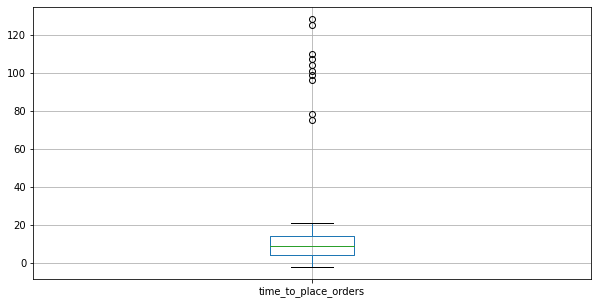

In [12]:
sales_eff.boxplot('time_to_place_orders',figsize=[10,5])

### Questions and notes on sales efficiency

1) Time to place orders follows no pattern, on average 17 days but 128 as an outliers sounds an alarm. I wonder what kind of deal we're talking about, it takes that long or are we inneficient? How long it takes for the best sellers to place an order? - We'll get there.

2) We have an interesting amount of outliers past the 2 months period. I'm assuming that sales team doesn't have the culture to fill the data about sales process, we have to validate this in order to start some good practices training.

In [13]:
#lets add this columns to our dataframe
df['order_placement'] = pd.Series.dt((df['data_venda_new']-df['data_solicitacao_new'])).days

In [14]:
#let's take a look at the incomplete sales
vendas_nao_pagas = df[df['data_pagto_new'].isna()]
vendas_nao_pagas

,valor_venda,pol_comissao,valor_comissao,estado_cliente,estado_vendedor,produto,vendedor_id,data_solicitacao_new,data_venda_new,data_pagto_new,order_placement
20,280000.0,0.01,2800.0,MG,MG,B,V_6,2021-04-25,2021-07-12,NaT,78
21,336000.0,0.01,3360.0,MG,MG,B,V_6,2021-03-24,2021-06-07,NaT,75
22,360000.0,0.01,3600.0,NaN,RJ,B,V_47,2021-03-23,2021-06-30,NaT,99
46,14500.0,0.026,NaN,NaN,SC,C,V_24,2021-06-02,2021-06-20,NaT,18
73,NaN,un.,450.0,NaN,RJ,D,V_21,2021-05-19,2021-05-22,NaT,3
79,NaN,un.,450.0,RS,RS,D,V_13,2021-05-11,2021-05-25,NaT,14
93,150000.0,0.04,6000.0,MG,SC,E,V_15,2021-06-13,2021-06-23,NaT,10


In [15]:
print(f' We have lost 7 sales opportunities which totalize {(vendas_nao_pagas.iloc[:,0].sum())} in revenue. We are not able to affirm that longer order placement result in incomplete sales. We must understand why it happened twice with V_6 seller.')

 We have lost 7 sales opportunities which totalize 1140500.0 in revenue. We are not able to affirm that longer order placement result in incomplete sales. We must understand why it happened twice with V_6 seller.


In [58]:
#To close this topic, I want to see who my top sellers are, and how they behave over the time to place a order. I'll state that by revenue, therefore we are dismissing rows where valor_venda is missing
clean_df = df[df['data_pagto_new'].notna()]
clean_df = df[df['valor_venda'].notna()]
vendas_ordens = clean_df[['vendedor_id','order_placement','valor_venda']].groupby('vendedor_id').agg({'valor_venda':'sum','order_placement':'mean'}).sort_values(by='valor_venda',ascending=False).round()
vendas_ordens = vendas_ordens['valor_venda'].head(10)


vendedor_id
V_25   2,002,000.00
V_5    1,716,000.00
V_45     744,000.00
V_46     620,000.00
V_6      616,000.00
V_34     432,000.00
V_40     392,000.00
V_47     360,000.00
V_15     330,000.00
V_14     330,000.00
Name: valor_venda, dtype: float64

In [59]:
#Total revenue for the period
clean_df['valor_venda'].sum()

8138240.0

<AxesSubplot:>

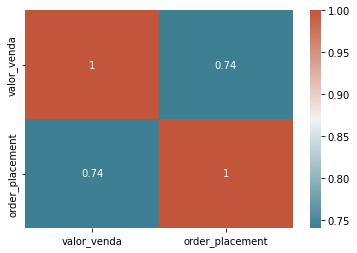

In [17]:
#It seems that the longer it takes to place an order, more productive are the sellers. Maybe we are talking about a more consultive kind of sale, which naturally takes longer to set better deals, but let's visualize the correlation to make sure.
corr = vendas_ordens.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))


In [18]:
#How many sellers didn't sell in the past 199 days?
bottom_performers = df.groupby('vendedor_id').agg({'valor_venda':'sum'}) == 0
bottom_performers.columns=['bottom_performer']
bottom_performers.bottom_performer.value_counts()

True     19
False    19
Name: bottom_performer, dtype: int64

### Insights on sales efficiency so far

1) There's a moderate correlation between longer order_placement on average and a more productive seller.
2) Half of our sales team didn't generate a single dollar in sales. This is a problem to be solved.

### Questions and notes on sales performance

Now I want to analyze sales performance, we don't have a reliable data set, and therefore I am taking the following assumptions:
1) I'll consider valor_venda as the revenue of each particular month. So at the end of the day we are looking at the opportunities that we had.
2) Since this is a small dataset, with only 98 rows and we have 65% of valor_vendas missing, I won't delete rows with NaN values.

The questions that I want to ask at this moment are:

Q1: How much we had in opportunities per month?

Q2: How our product mix has performed? In revenue and in contribution.

Q3: How sellers performed?

Q4: What is the average ticket per state and per month?

In [19]:
#Separating date attributes from data_solicitacao in order to analyze periodically

df['Year'] = pd.DatetimeIndex(df['data_solicitacao_new']).year
df['Month'] = pd.DatetimeIndex(df['data_solicitacao_new']).month
df['YearMonth'] = pd.to_datetime(df['data_solicitacao_new']).dt.to_period('M')
df.head()

,valor_venda,pol_comissao,valor_comissao,estado_cliente,estado_vendedor,produto,vendedor_id,data_solicitacao_new,data_venda_new,data_pagto_new,order_placement,Year,Month,YearMonth
0,NaN,un.,750.0,SC,PR,A,V_1,2021-01-13,2021-01-12,2021-02-01,-1,2021,1,2021-01
1,NaN,un.,750.0,SC,PR,A,V_1,2021-02-14,2021-02-16,2021-03-01,2,2021,2,2021-02
2,NaN,un.,750.0,NaN,PR,A,V_23,2021-02-17,2021-02-18,2021-03-01,1,2021,2,2021-02
3,NaN,un.,750.0,NaN,PR,A,V_23,2021-03-21,2021-03-25,2021-04-01,4,2021,3,2021-03
4,NaN,un.,750.0,NaN,PR,A,V_30,2021-01-29,2021-01-31,2021-03-01,2,2021,1,2021-01


In [20]:
#before we do anything else, let's apply the 2 decimals float format for better reading of our data
pd.options.display.float_format = "{:,.2f}".format

In [21]:
#Looking at sales performance per month. has our revenue grown over time? How many sales occurred in each month?
monthly_revenue = df[['YearMonth','valor_venda']].groupby('YearMonth').sum()
monthly_revenue['MonthlyGrowth'] = monthly_revenue['valor_venda'].pct_change()
monthly_revenue['VolSales'] = df[['valor_venda','YearMonth']].groupby('YearMonth').count()
monthly_revenue['AvgTicket'] = (monthly_revenue['valor_venda']/monthly_revenue['VolSales'])
monthly_revenue.reset_index()

,YearMonth,valor_venda,MonthlyGrowth,VolSales,AvgTicket
0,2020-12,"1,680,000.00",NaN,2,"840,000.00"
1,2021-01,"2,641,400.00",0.57,5,"528,280.00"
2,2021-02,"1,663,300.00",-0.37,7,"237,614.29"
3,2021-03,"975,200.00",-0.41,8,"121,900.00"
4,2021-04,"607,360.00",-0.38,7,"86,765.71"
5,2021-05,"399,080.00",-0.34,6,"66,513.33"
6,2021-06,"171,900.00",-0.57,3,"57,300.00"


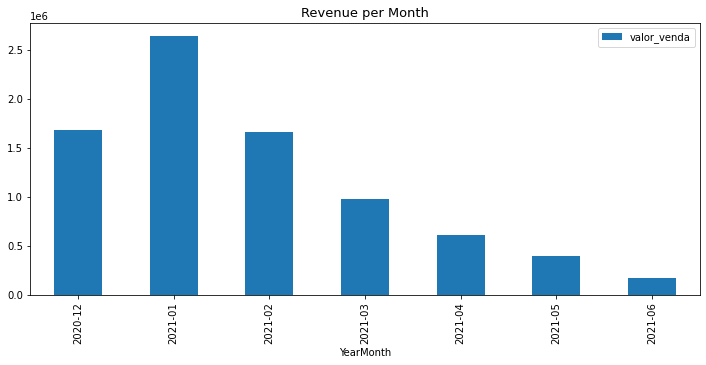

In [33]:
plot_monthly_revenue = monthly_revenue.plot(kind='bar',y='valor_venda',figsize=[12,5]).set_title('Revenue per Month', fontsize=13)
plot_monthly_revenue
plt.savefig('plot.png', dpi=300, bbox_inches='tight')



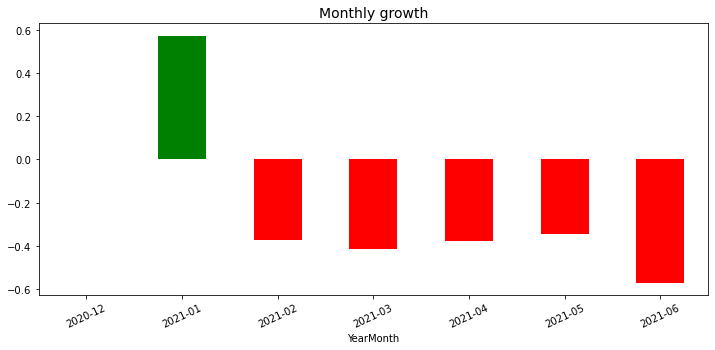

In [34]:
# A better understanding on MoM changes
monthly_revenue['MonthlyGrowth'].plot(kind='bar', rot=25,figsize=[12,5], color=monthly_revenue['MonthlyGrowth'].apply(lambda x: 'g' if x>0 else 'r')).set_title('Monthly growth', fontsize=14)
plt.savefig('plot_2.png', dpi=300, bbox_inches='tight')


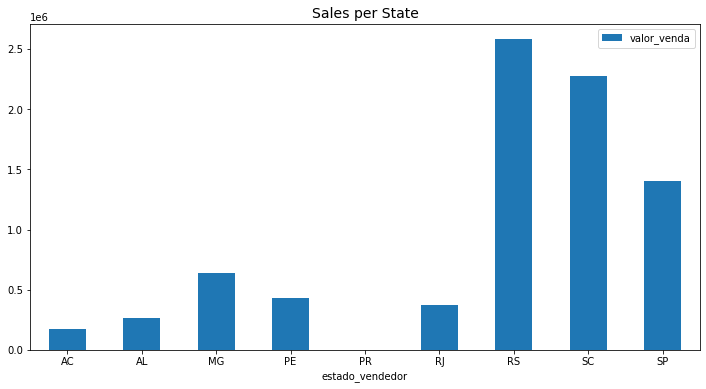

In [35]:
#Huge drop! And gradually getting worse month after month. Yes, only half of sales team has achieved something, but lets not forget that we are working on a non-reliable dataset.
state_rev = df.groupby('estado_vendedor').agg({'valor_venda':'sum'})
state_rev.plot(kind='bar',rot=360, figsize=[12,6]).set_title('Sales per State', fontsize=14)
plt.savefig('plot_#.png', dpi=300, bbox_inches='tight')


In [25]:
# Okay RS is the greatest contributor. We'll see a table to understand exactly how much.
# So PR hasn't filled any revenue in 200 days, do we have demand there? Operation? Can we cut some cost there?
state_rev_deepdive = df[['estado_vendedor','valor_venda']].groupby('estado_vendedor').sum()
#Let's add a count of how many sales people we have per state
state_rev_deepdive['count_salesperson'] = df[['estado_vendedor','vendedor_id']].groupby('estado_vendedor').nunique()
# We probably have to close PR operations.
# How can we increase RJ performance close to top 3?
df['valor_venda'] = pd.to_numeric(df['valor_venda'])
state_rev_deepdive['contribution'] = (state_rev_deepdive['valor_venda']/state_rev_deepdive['valor_venda'].sum())
state_rev_deepdive['revenue_per_seller'] = (state_rev_deepdive['valor_venda']/state_rev_deepdive['count_salesperson'])
state_rev_deepdive.sort_values(by='contribution',ascending=False)

,valor_venda,count_salesperson,contribution,revenue_per_seller
estado_vendedor,,,,
RS,"2,580,230.00",8,0.32,"322,528.75"
SC,"2,279,020.00",6,0.28,"379,836.67"
SP,"1,401,840.00",8,0.17,"175,230.00"
MG,"635,250.00",4,0.08,"158,812.50"
PE,"432,000.00",1,0.05,"432,000.00"
RJ,"369,900.00",5,0.05,"73,980.00"
AL,"264,000.00",2,0.03,"132,000.00"
AC,"176,000.00",2,0.02,"88,000.00"
PR,0.00,3,0.00,0.00


In [26]:
#Who are the sellers in PR
df.loc[df['estado_vendedor'] =='PR','vendedor_id'].drop_duplicates()

0     V_1
2    V_23
4    V_30
Name: vendedor_id, dtype: object

In [27]:
#Who are the sellers in RJ and how did they perform
rj_team = df[['estado_vendedor','vendedor_id','valor_venda']]
rj_team = rj_team[rj_team['estado_vendedor'] == 'RJ']
rj_team.groupby('vendedor_id').sum()

,valor_venda
vendedor_id,
V_20,0.00
V_21,0.00
V_22,"9,900.00"
V_27,0.00
V_47,"360,000.00"


In [28]:
#lets take a look on how was the performance by product type
product_rev = df[['produto','valor_venda']].groupby('produto').sum()
product_rev['contribution'] = (product_rev['valor_venda']/product_rev['valor_venda'].sum())
product_rev['avg_ticket'] = (product_rev['valor_venda']/product_rev['valor_venda'].count())
product_rev.sort_values(by='contribution',ascending=False)

,valor_venda,contribution,avg_ticket
produto,,,
B,"6,490,000.00",0.80,"1,081,666.67"
E,"1,496,000.00",0.18,"249,333.33"
C,"152,240.00",0.02,"25,373.33"
A,0.00,0.00,0.00
D,0.00,0.00,0.00
F,0.00,0.00,0.00


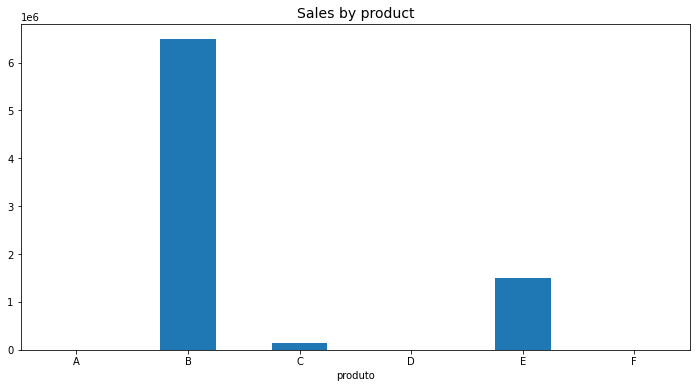

In [37]:
product_rev['valor_venda'].plot(kind='bar',rot=360, figsize=[12,6]).set_title('Sales by product', fontsize=14)
plt.savefig('plot_4.png', dpi=300, bbox_inches='tight')


### Insights on Sales Performance

Note: I understand that we have lot of missing data, and it may be leading to an incorrect analysis, considering this every action quoted below must be interpreted as a suggestion over the data we had available.

1) There's no correlation between volume of sales and total revenue. Therefore, I assume we are not being effective on total opportunities conversion neither in generating the best deals.

#### per State

1) PR is an operating site that generate no return. We should either work on improving our workforce, or dismiss them reducing costs and giving the region to another group of more effective sellers.

2) RJ is one of the top business area of BR, has about the same amount of sellers of our top 3 states in revenue, but represents only 5% of sales. My take: we should remanage workforce and set higher goals for that team.

3) PE is a region to be explored and perhaps we could increase workforce

#### per Product

1) We understand by this dataset that only products B, E, and C have made any sales. Sales strategy over products A, D and F are not working, which we can understand as: a) lack of market fit, b) lack of sellers disposition to sell this products, c) inefficient go-to-market strategy. Therefore, we either drop these product from our mix, or we change the strategy and incentives.  

##### Sellers performance
1) Half of our workforce can be either re-managed or dismissed since it hasn't made any sales.



### Analysis that I'd like to make

1) First of all, everything done before can be remade if the dataset is complete, producing a reliable analysis.

2) I'd like to have some data that helped to understand the profit of each state and each product.

3) Total addressable market per region would be helpfull to better alocate workforce.

### That's it for now, thank you!